In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os

In [ ]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# get all the file names in the directory
files = os.listdir('rain_data')
#For all the file in the rain_data directory, drop the 'Unnamed 0' column, and change Date column name to Local Date
for file in files:
    df = pd.read_csv('rain_data/' + file)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.rename(columns={'Date': 'Date Local'}, inplace=True)
    df.to_csv('rain_data/' + file, index=False)


In [95]:
import pandas as pd

# Read the CSV
ozoneDf = pd.read_csv('Ozone2023.csv')
#filter city name Los Angeles, Phoenix, New York, Philadelphia, Washington,
#Salt Lake City, Atlanta, Miami, Chicago, Boston

ozoneDf = ozoneDf[ozoneDf['City Name'].isin(['Los Angeles', 'Phoenix', 'New York', 'Philadelphia', 'Washington', 'Salt Lake City', 'Atlanta', 'Miami', 'Chicago', 'Boston'])]
# Keep only selected columns
ozoneDf = ozoneDf[['Date Local', 'Arithmetic Mean', 'State Name', 'City Name', 'Site Num']]
# Rename 'Arithmetic Mean' to 'Ozone Arithmetic Mean'
ozoneDf.rename(columns={'Arithmetic Mean': 'Ozone Arithmetic Mean'}, inplace=True)
ozoneDf.to_csv('Ozone2023.csv', index=False)


/var/folders/kd/2c5f0yd15v354rgh5wxlmmnm0000gn/T/ipykernel_33247/549293660.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ozoneDf = pd.read_csv('Ozone2023.csv')


In [203]:
import os
# get all the file names in the directory
files = os.listdir('rain_data')

#for all the files in the rain_data directory, eliminate all rows with date < 2001-01-01
for file in files:
    df = pd.read_csv('rain_data/' + file)
    df = df[df['Date Local'] >= '2001-01-01']
    df.to_csv('rain_data/' + file, index=False)


In [102]:
import pandas as pd

def mergingDataframes(cityName):
    cityWeather = pd.read_csv('rain_data/' + cityName + '.csv')
    cityData = pd.read_csv(cityName + '.csv')
    df = pd.merge(cityData, cityWeather, on=['Date Local'], how='inner')
    df['Year'] = pd.to_datetime(df['Date Local']).dt.year
    df['Average Temperature'] = (df['tmax'] + df['tmin']) / 2
    #delete City Name_y, and rename City Name_x to City Name
    # df.drop(['City Name_y'], axis=1, inplace=True)
    # df.rename(columns={'City Name_x': 'City Name'}, inplace=True)
    #drop duplicates
    df.drop_duplicates(inplace=True)
    # Ensure 'Date Local' is a datetime object
    df['Date Local'] = pd.to_datetime(df['Date Local'])

    # Group by 'Date Local' and preserve other columns
    grouped_df = (
        df.groupby('Date Local', as_index=False)
        .agg({
            'Average Temperature': 'mean',  # Calculate the mean of Average Temperature
            'Ozone Arithmetic Mean': 'mean',  # Example: Mean of numerical column
            # 'State Name': 'first',  # Keep the first value (assuming all are the same for a date)
            # 'City Name': 'first',   # Same as above
            # 'Site Num': 'first',    # Example: Keep the first value
            'Carbon Arithmetic Mean': 'mean',  # Example: Mean of numerical column
            'tmax': 'mean',         # Mean of tmax
            'tmin': 'mean',         # Mean of tmin
            'prcp': 'mean',         # Mean of prcp
            'Year': 'first'         # Keep the first year
        })
    )

    grouped_df.to_csv(cityName + '.csv', index=False)
mergingDataframes('Austin')


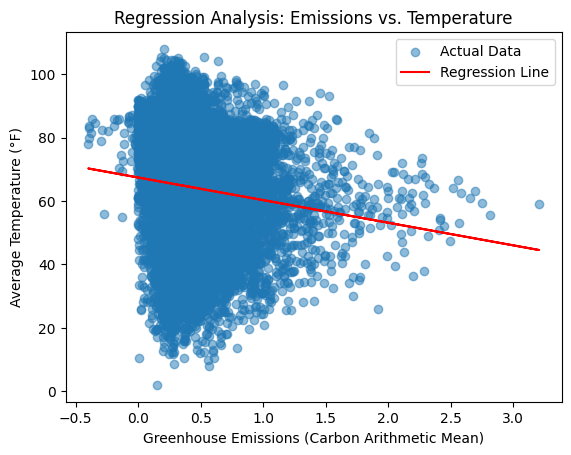

R-squared value: 0.015236507642813257


In [110]:
# Load needed packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('WeatherCarbonAndOzoneData.csv')


# Create an average temperature column
data['avg_temp'] = (data['tmax'] + data['tmin']) / 2

# Select relevant columns and drop rows with missing values
data_filtered = data[['Carbon Arithmetic Mean', 'avg_temp']].dropna()

# Split the data into features (X) and target (y)
X = data_filtered[['Carbon Arithmetic Mean']]
y = data_filtered['avg_temp']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared to assess the model
r2 = r2_score(y_test, y_pred)

# Plot the relationship and regression line
plt.scatter(X_test, y_test, label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Greenhouse Emissions (Carbon Arithmetic Mean)')
plt.ylabel('Average Temperature (°F)')
plt.title('Regression Analysis: Emissions vs. Temperature')
plt.legend()
plt.show()

print(f"R-squared value: {r2}")

In [69]:
df = pd.read_csv('WeatherCarbonAndOzoneData.csv')
#average temperature for Salt Lake City for 2001
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df2001 = df[(df['Date Local'].dt.year == 2006) & (df['City Name'] == 'Salt Lake City')]
averageTemp2001 = df2001['Average Temperature'].mean()
print(averageTemp2001)
#average temperature for Salt Lake City for 2001
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df2001 = df[(df['Date Local'].dt.year == 2023) & (df['City Name'] == 'Salt Lake City')]
averageTemp2001 = df2001['Average Temperature'].mean()
print(averageTemp2001)


53.719718309859154
55.60630136986302


In [109]:
df = pd.read_csv('WeatherCarbonAndOzoneData.csv')
#whats the average temperature for year 2001
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')  # Handle non-datetime values gracefully
df2001 = df[df['Date Local'].dt.year == 2001]
averageTemp2001 = df2001['Average Temperature'].mean()
print(averageTemp2001)

#whats the average temperature for year 2023
df2023 = df[df['Date Local'].dt.year == 2023]
averageTemp2023 = df2023['Average Temperature'].mean()
print(averageTemp2023)

63.694607673695124
65.35216919739696


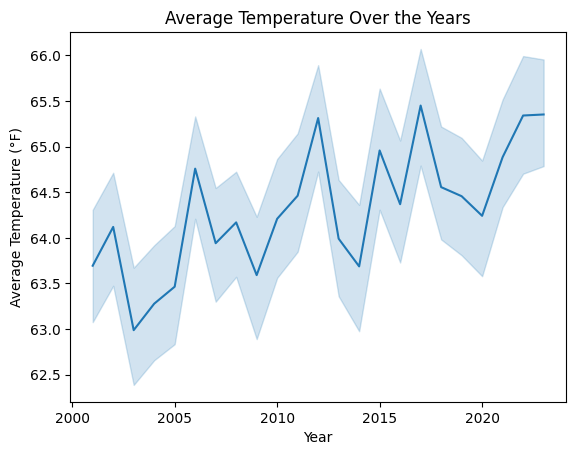

In [114]:
#graph temperature per year for the df
df = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df = df[['Year', 'Average Temperature']]
sns.lineplot(data=df, x='Year', y='Average Temperature')
plt.title('Average Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.show()

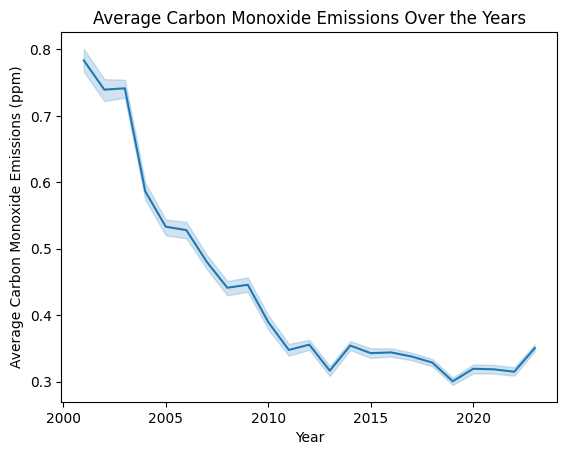

In [115]:
#graph temperature per year for the df
df = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df = df[['Year', 'Carbon Arithmetic Mean']]
sns.lineplot(data=df, x='Year', y='Carbon Arithmetic Mean')
plt.title('Average Carbon Monoxide Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Carbon Monoxide Emissions (ppm)')
plt.show()

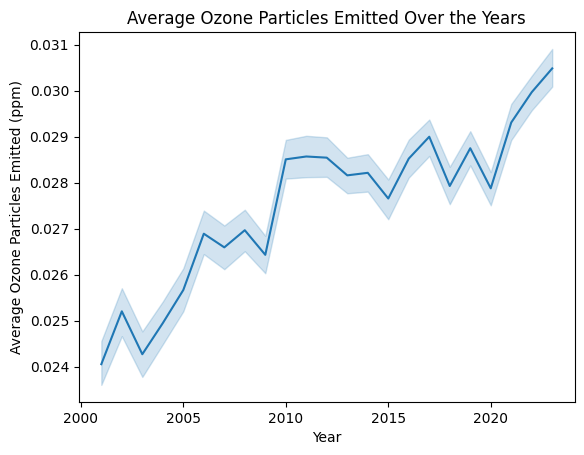

In [116]:
#graph temperature per year for the df
df = pd.read_csv('CompleteWeatherCarbonAndOzoneData.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df = df[['Year', 'Ozone Arithmetic Mean']]
sns.lineplot(data=df, x='Year', y='Ozone Arithmetic Mean')
plt.title('Average Ozone Particles Emitted Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Ozone Particles Emitted (ppm)')
plt.show()